In [20]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


df=pd.read_csv("Dataset of Diabetes .csv")
df.head()
#df.info()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [2]:
df.isnull().sum()

df.duplicated().sum()

le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df['Gender']


df.drop("ID",axis=1,inplace=True) 
df.drop("No_Pation",axis=1, inplace=True) 
df


x=df.iloc[:,0:11]
y=df["CLASS"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)

x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
687,1,62,5.0,63,12.2,3.6,5.1,0.9,2.5,0.9,30.00
500,1,52,5.4,56,7.9,4.9,2.1,1.1,2.5,0.9,28.00
332,0,61,3.3,31,7.2,5.8,2.6,1.6,0.9,1.5,36.00
979,0,20,4.6,70,9.6,4.1,1.8,1.0,2.3,0.8,30.00
817,1,54,2.9,79,10.3,5.0,3.2,1.8,1.7,2.0,30.00
...,...,...,...,...,...,...,...,...,...,...,...
835,1,55,7.1,72,12.2,6.9,4.5,1.3,1.4,1.0,26.00
192,1,33,3.3,76,9.7,2.4,1.9,0.8,2.5,13.1,21.17
629,1,57,4.1,63,9.7,3.6,5.1,0.9,2.5,0.9,30.00
559,1,55,2.6,48,11.8,5.1,1.2,1.0,3.6,1.6,36.00


-------------------DECISION TREE ACCURACY----------------------------
*DECISION TREE ACCURACY* 

Final Accuracy is :
  0.985


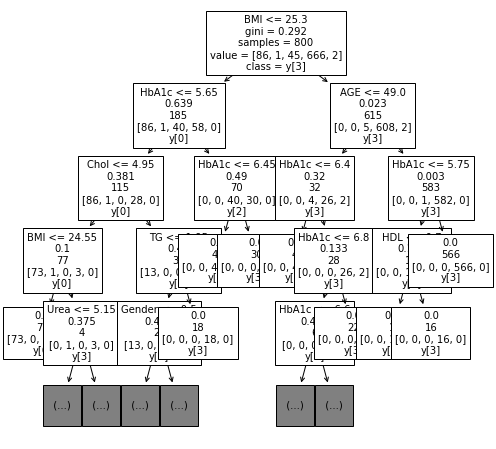

In [3]:
#----------------------Decision_Tree---------------------------------------
classifier1=DecisionTreeClassifier()
#accuracy=cross_val_score(classifier1 ,x_train,y_train , scoring='accuracy'  , n_jobs= -1 ).mean()
#print(accuracy)
classifier1.fit(x_train,y_train)
predection= classifier1.predict(x_test)
accuracy=accuracy_score(y_test,predection)
names=list(df.columns.values)
plt.figure(figsize=(8,8))
figure=plot_tree(classifier1,feature_names=names,max_depth=4,fontsize=10,label='root',class_names=True)
print("-------------------DECISION TREE ACCURACY----------------------------")
print("*DECISION TREE ACCURACY* \n")
print("Final Accuracy is :\n ",accuracy)


In [4]:
#-----------------------Naive_bayes-----------------------------------------
GA = GaussianNB()
GA.fit(x_train, y_train)
y_pred = GA.predict(x_test)
#print(y_pred)
print("---------------------GUASSIAN NB ACCURACY-------------------------------")
print("*GUASSIAN NB ACCURACY*\n")
print("Final Accuracy is :\n", metrics.accuracy_score(y_test, y_pred))
#F_score=f1_score(y_test,y_pred,average='macro')
#print("F1_score :\n",F_score)

---------------------GUASSIAN NB ACCURACY-------------------------------
*GUASSIAN NB ACCURACY*

Final Accuracy is :
 0.94


In [5]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#print(y_pred)
print("------------------------K-NEIGHBORS ACCURACY--------------------------")
print("*K-NEIGHBORS ACCURACY*\n")
print("Final Accuracy is:\n",metrics.accuracy_score(y_test, y_pred))
#F_score=f1_score(y_test,y_pred,average='macro')
#print("\n")
#print("F1_score:\n",F_score)

------------------------K-NEIGHBORS ACCURACY--------------------------
*K-NEIGHBORS ACCURACY*

Final Accuracy is:
 0.89


In [6]:
#-----------------------------SVM--------------------------------------------

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.2,random_state=2 )

classifier= SVC(kernel='linear',random_state=0)
classifier.fit(x_train, y_train)

x_train_prediction = classifier.predict(x_train)
training_accuracy=accuracy_score(x_train_prediction, y_train)

x_test_prediction = classifier.predict(x_test)
test_accuracy=accuracy_score(x_test_prediction, y_test)
print("------------------------SVC ACCURACY----------------------------------")
print("*SVC ACCURACY*\n")
print("*Final Accuracy is:\n",test_accuracy)


------------------------SVC ACCURACY----------------------------------
*SVC ACCURACY*

*Final Accuracy is:
 0.94


In [7]:
#-------------------------Final Result----------------------------------
print("-------------------------FINAL ANSWERS----------------------------------")
print (" 1) Percentage of younger people that are prone to diabetes is : (4/35 = 0.075)\n", "Final percentage is 0.075%\n")
print (" 2) Percentage of women that are prone to diabetes is : (17/35 = 0.321)\n", "Final percentage is 0.321%\n")
prinb=("So women is less prone to diabetes than males")

"""diabetic = 844
non-diabetic = 103
predicate = 53
"""
df["Cr"].value_counts()
df["HbA1c"].value_counts()
df["CLASS"].value_counts()
df.loc[df["BMI"] >=30, "CLASS"].value_counts()
df["CLASS"].describe()
df.loc[df["BMI"]<30].value_counts()

-------------------------FINAL ANSWERS----------------------------------
 1) Percentage of younger people that are prone to diabetes is : (4/35 = 0.075)
 Final percentage is 0.075%

 2) Percentage of women that are prone to diabetes is : (17/35 = 0.321)
 Final percentage is 0.321%



Gender  AGE  Urea  Cr  HbA1c  Chol  TG   HDL   LDL   VLDL  BMI   CLASS
1       55   5.7   76  6.8    5.5   1.5  0.70  4.10  0.7   29.0  Y        4
0       48   4.0   38  6.8    4.4   2.3  1.30  2.20  1.0   25.0  Y        4
        50   4.7   46  4.9    4.2   0.9  2.40  1.40  0.5   24.0  N        3
1       50   4.3   59  6.1    4.0   3.0  1.00  1.80  1.3   24.0  P        2
0       50   4.0   56  13.7   4.4   2.0  1.00  2.50  0.9   29.0  Y        2
                                                                         ..
        56   3.8   42  9.0    4.0   5.1  1.75  0.96  2.2   26.0  Y        1
             3.6   48  15.0   7.7   4.7  5.00  2.10  2.0   28.0  Y        1
             2.8   51  7.0    5.3   2.1  1.60  2.90  0.9   21.0  Y        1
             2.3   22  10.2   5.8   2.0  1.10  1.80  0.9   27.0  Y        1
1       30   6.0   97  5.8    4.2   1.7  1.20  2.20  0.8   19.0  P        1
Length: 394, dtype: int64

<AxesSubplot:xlabel='CLASS', ylabel='count'>

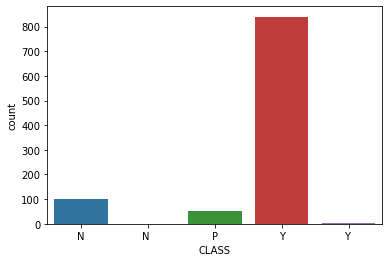

In [8]:
# visualization_countplot
sns.countplot(x = "CLASS",data = df)

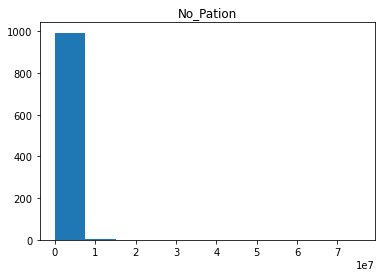

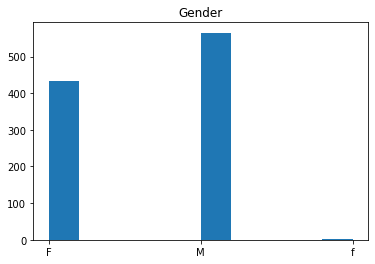

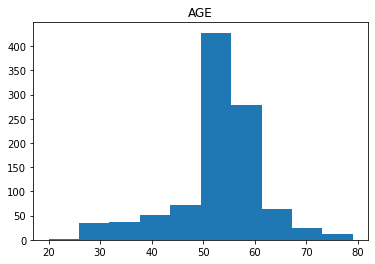

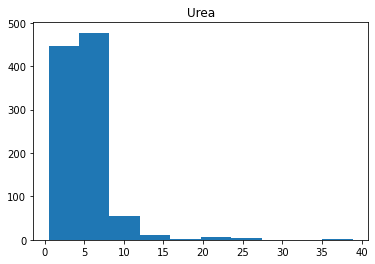

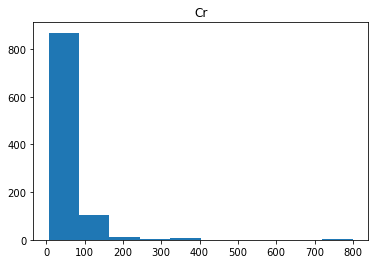

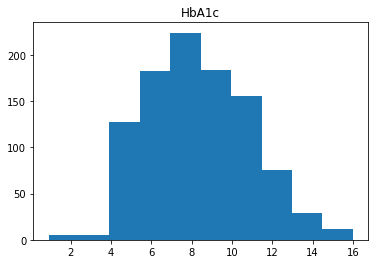

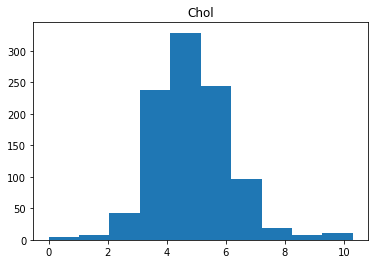

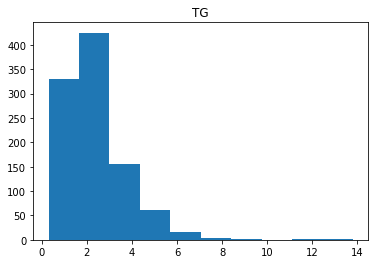

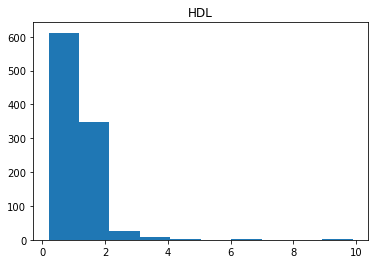

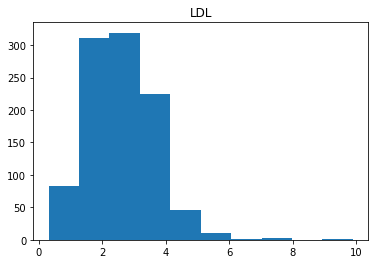

In [57]:
#visualization_each feature
for i in df.iloc[:,1:11]:    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(df[i])
    

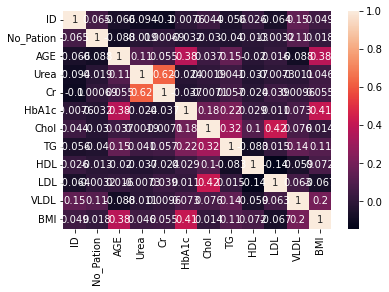

In [55]:
#heatmap_visualization
sns.heatmap(df.corr(), annot = True)
plt.show()